In [9]:
# import required libraries
from glob import glob
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras import Input
import keras

In [10]:
# Class for Image Preprocessing that we have done in the project
from Data_Preprocessing import ImagePreprocessing

In [11]:
# path of dataset
path = r"data"

In [12]:
# it will take path of dataset to get all images and labels(folder name that store images)
# it will call function facial_detection_img from class ImagePreprocessing in file Data_Preprocessing.py
# return X, Y, idx, X is features of images, Y is labels of images, idx is dictionary of label and index (ex:{"angry":0,"happy":1,"neutral":2})
def make_data(path):
    image_preprocessing = ImagePreprocessing()
    X = []
    Y = []
    label_folders = os.listdir(path)
    # label_folder = ['angry','happy','neutral']
    idx = {label_folders[i]:i for i in range(len(label_folders))}
    for label_folder in label_folders:
        file_paths = glob(path+"/"+label_folder+"/*.*")
        # file_paths = file_paths[:20]
        for file_path in file_paths:
            img = cv2.imread(file_path)
            img = image_preprocessing.facial_detection_img(img)
            if img is None:
                continue
            X.append(img)
            Y.append(idx[label_folder])
    return X, Y , idx

In [13]:
# give path of dataset to get return data that ready to train
X, Y,Idx = make_data(path)
# X is features 
# Y is labels
# Idx is dictionary of label and index (ex:{"angry":0,"happy":1,"neutral":2})

In [14]:
# convert X to numpy array
X = np.array(X)

In [160]:
# import required library


In [15]:
# define a sequential model with 4 convolutional layers 
# it will take input shape of image (224,224,3)
# it will use relu activation function for convolutional layers
# it will use softmax activation function for fully connected layers
# it will use adam optimizer
# it will use categorical_crossentropy loss function
# it will use accuracy metrics
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# convert Y to categorical (it similar to one hot encoding)
_Y = keras.utils.to_categorical(Y)

In [17]:
# train model
model.fit(X,_Y, epochs=100, batch_size=16)

Epoch 1/100


6/6 [==============================] - 4s 382ms/step - loss: 534.1708 - accuracy: 0.3678
Epoch 2/100
6/6 [==============================] - 4s 518ms/step - loss: 18.4518 - accuracy: 0.2874
Epoch 3/100
6/6 [==============================] - 2s 417ms/step - loss: 1.2689 - accuracy: 0.4138
Epoch 4/100
6/6 [==============================] - 2s 393ms/step - loss: 1.0513 - accuracy: 0.4368
Epoch 5/100
6/6 [==============================] - 3s 538ms/step - loss: 0.9022 - accuracy: 0.4368
Epoch 6/100
6/6 [==============================] - 3s 489ms/step - loss: 0.8949 - accuracy: 0.5747
Epoch 7/100
6/6 [==============================] - 4s 590ms/step - loss: 0.7578 - accuracy: 0.6322
Epoch 8/100
6/6 [==============================] - 3s 480ms/step - loss: 0.7822 - accuracy: 0.6437
Epoch 9/100
6/6 [==============================] - 3s 438ms/step - loss: 0.7235 - accuracy: 0.6897
Epoch 10/100
6/6 [==============================] - 3s 450ms/step - loss: 0.7539 - accuracy: 0.6322
Epoc

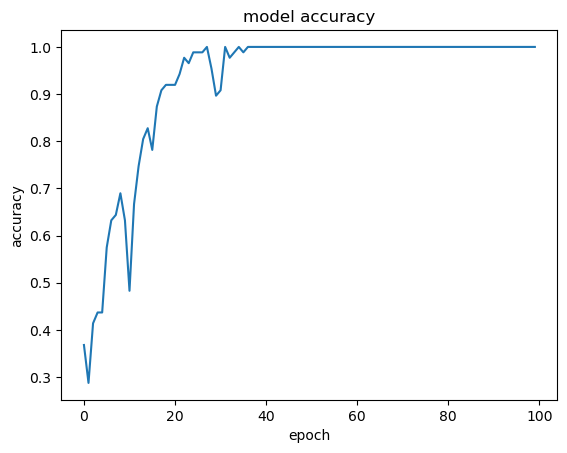

In [18]:
# show visualization between epochs and accuracy and loss
plt.plot(model.history.history['accuracy'])
# title of plot
plt.title('model accuracy')
# label of x axis
plt.xlabel('epoch')
# label of y axis
plt.ylabel('accuracy')
# show plot
plt.show()

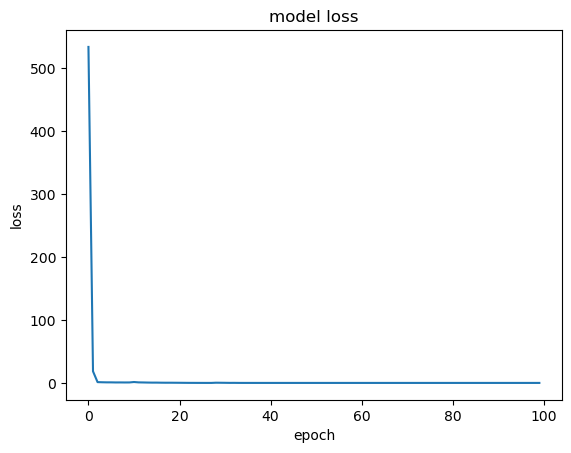

In [19]:
plt.plot(model.history.history['loss'])
# title of plot
plt.title('model loss')
# label of x axis
plt.xlabel('epoch')
# label of y axis
plt.ylabel('loss')
# show plot
plt.show()

In [20]:
# save model
model.save("model.h5")

c:\Users\davan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
